# Testing Newton Solver

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from quantumnetworks import SingleModeSystem, plot_full_evolution, MultiModeSystem, animate_evolution
import numpy as np
import matplotlib.pyplot as plt

## Dissipative `SingleModeSystem`

<div>
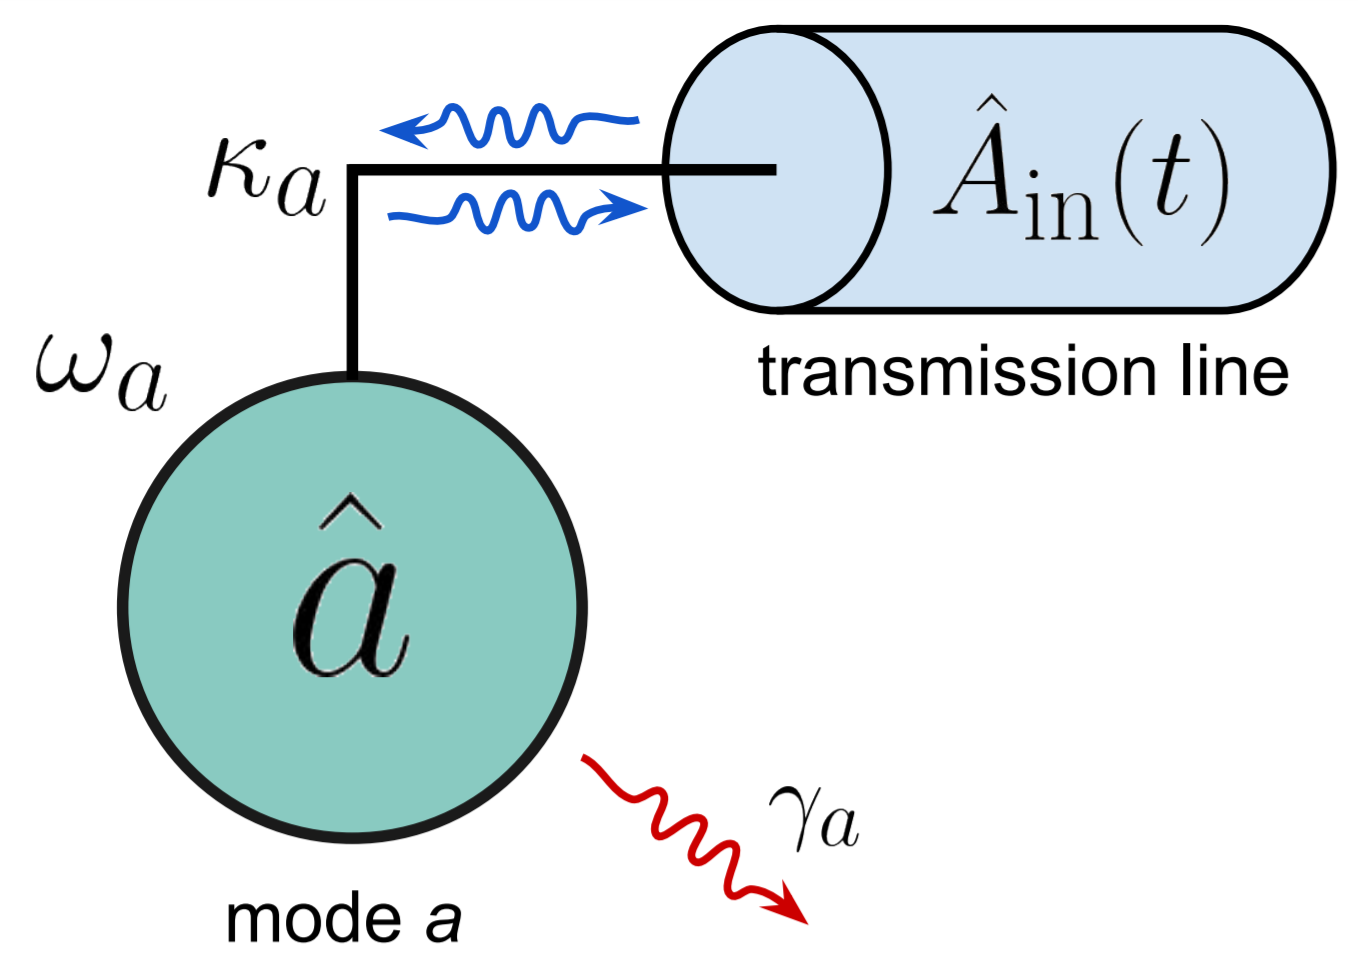
</div>

## Forward Euler

Check the bug in https://github.com/Phionx/quantumnetworks/issues/20

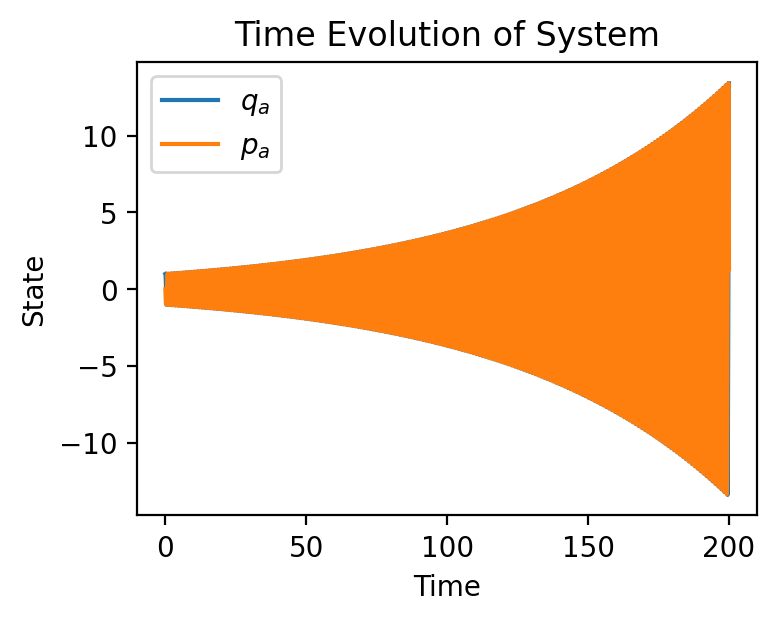

In [3]:
A_in = lambda t: 0
sys = SingleModeSystem(params={"omega_a": 6, "kappa_a": 0, "kerr_a":0, "gamma_a": 0.01}, A_in = A_in)
x_0 = np.array([1,0])
ts = np.linspace(0, 200, 200001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

## Trapezoidal Method

### Newton Solver

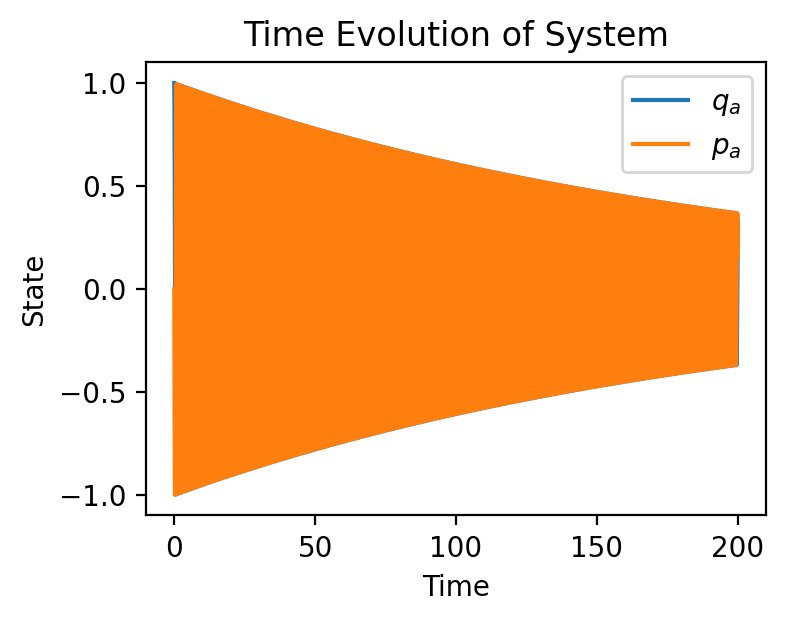

In [4]:
A_in = lambda t: 0
sys = SingleModeSystem(params={"omega_a": 6, "kappa_a": 0, "kerr_a": 0, "gamma_a": 0.01}, A_in = A_in)
x_0 = np.array([1,0])
ts = np.linspace(0, 200, 20001)
X = sys.trapezoidal(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

In [5]:
fig, axs = animate_evolution(X,ts, num_frames=100, animation_time=5)

### NewtonGCR Solver

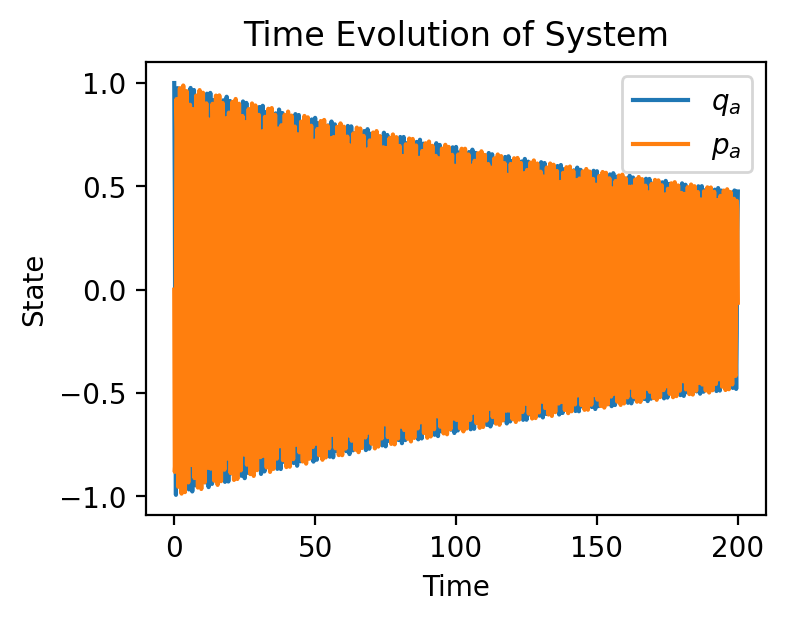

In [7]:
A_in = lambda t: 0
sys = SingleModeSystem(params={"omega_a": 6, "kappa_a": 0, "kerr_a": 0, "gamma_a": 0.01}, A_in = A_in)
x_0 = np.array([1,0])
ts = np.linspace(0, 200, 1001)
X = sys.trapezoidal(x_0, ts, use_gcr=True)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

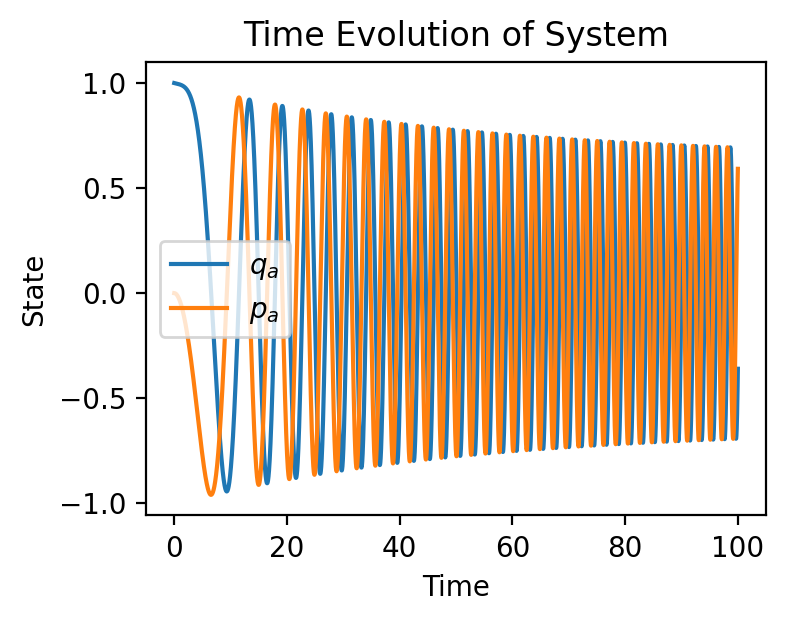

In [8]:
A_in = lambda t: 0
sys = SingleModeSystem(params={"omega_a": 6, "kappa_a": 0.00001, "kerr_a":-3}, A_in = A_in)
x_0 = np.array([1,0])
ts = np.linspace(0, 100, 100001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

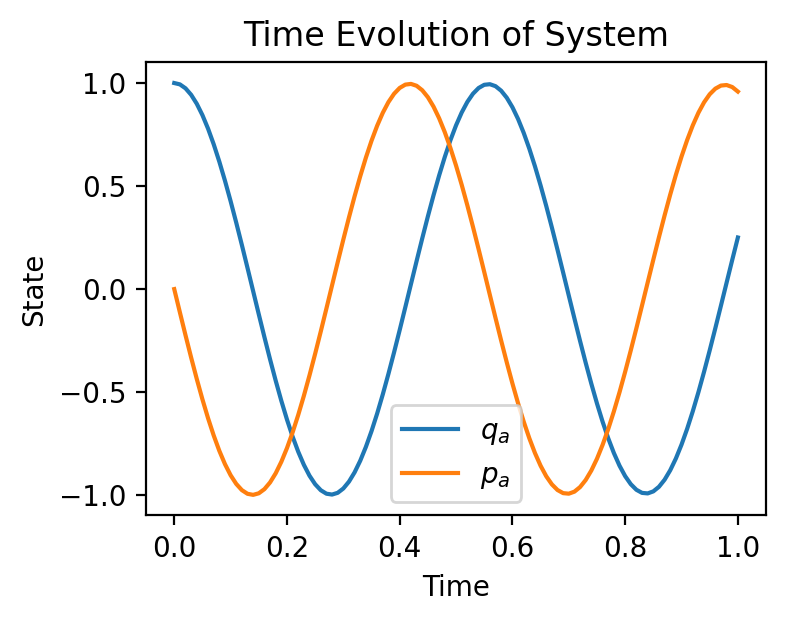

In [11]:
A_in = lambda t: 0
sys = SingleModeSystem(params={"omega_a": 2*np.pi*1, "kappa_a": 2*np.pi*0.001, "kerr_a":2*np.pi*.4}, A_in = A_in)
x_0 = np.array([1,0])
ts = np.linspace(0, 1, 101)
X = sys.trapezoidal(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

In [109]:
sys = SingleModeSystem(params={"omega_a": 2*np.pi*1, "kappa_a": 2*np.pi*0.001, "kerr_a":2*np.pi*.4}, A_in = A_in)
x_start = np.array([1,0])
ts = np.linspace(0, 1, 11)


X = 1.0 * np.zeros((x_start.size, ts.size))
X[:, 0] = x_start
dt = ts[1] - ts[0]
ts = np.append(ts, ts[-1] + dt)  # needed for last step

u = sys.eval_u(ts[0])
u_next = sys.eval_u(ts[1])

i = 0

f = sys.eval_f(X[:, i], u)
x_next_good_guess = X[:, i] + dt * f  # use Euler as a good initial guess
x_next_bad_guess_0 = np.array([2.5,0])
x_next_bad_guess = np.array([-10,10])
x_next_bad_guess_2 = np.array([1000000,-1000000])

p = {"dt": dt, "f": f, "x": X[:, i], "u_next": u_next}
good_iterations, converged = sys.newton(x_next_good_guess, p, return_iterations=True)
bad_iterations_0, converged = sys.newton(x_next_bad_guess_0, p, return_iterations=True, use_gcr=True)
bad_iterations, converged = sys.newton(x_next_bad_guess, p, return_iterations=True)
bad_iterations_2, converged = sys.newton(x_next_bad_guess_2, p, return_iterations=True)



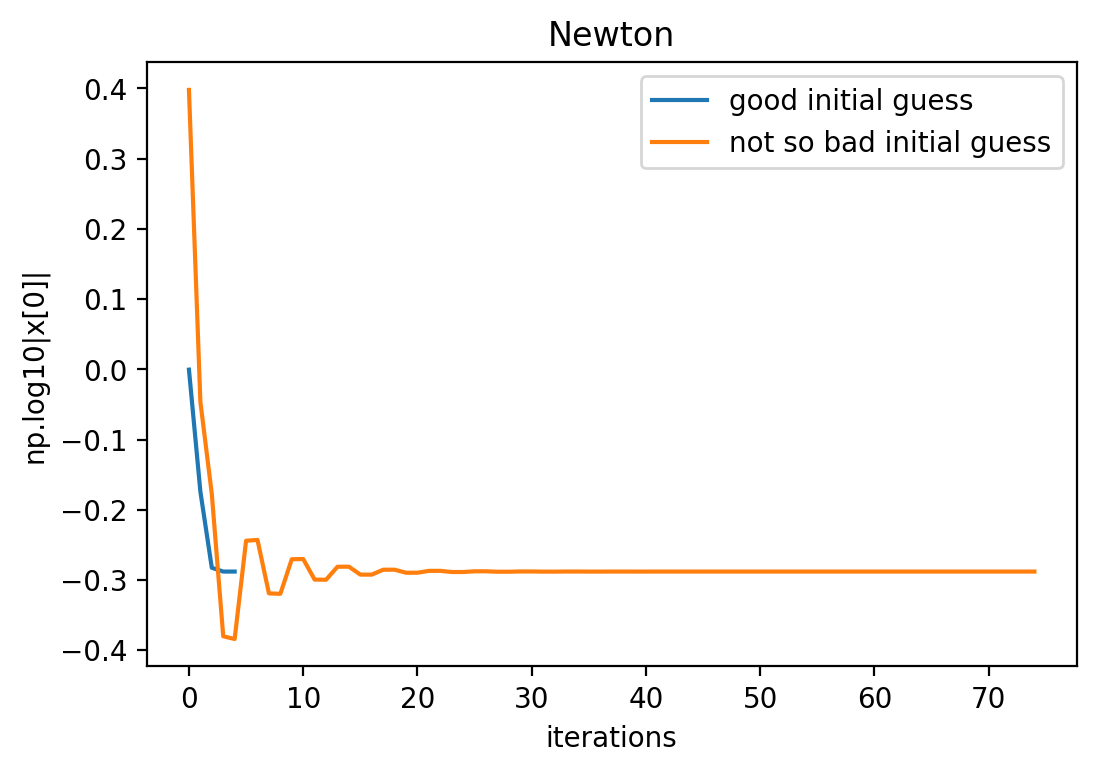

In [111]:
fig, ax = plt.subplots(1, dpi =200)

iters = good_iterations
ax.plot(np.arange(len(iters[:,0])), np.log10(np.abs(iters[:,0])), label="good initial guess") 

iters = bad_iterations_0
ax.plot(np.arange(len(iters[:,0])), np.log10(np.abs(iters[:,0])), label="not so bad initial guess") 


# iters = bad_iterations
# ax.plot(np.arange(len(iters[:,0])), np.log10(np.abs(iters[:,0])), label="bad initial guess") 

# iters = bad_iterations_2
# ax.plot(np.arange(len(iters[:,0])), np.log10(np.abs(iters[:,0])), label="worse initial guess") 

ax.set_xlabel("iterations")
ax.set_ylabel("np.log10|x[0]|")
ax.set_title("Newton")
plt.legend()
plt.show()

In [121]:
sys = SingleModeSystem(params={"omega_a": 2*np.pi*1, "kappa_a": 2*np.pi*0.001, "kerr_a":2*np.pi*.4}, A_in = A_in)
x_start = np.array([1,0])
ts = np.linspace(0, 1, 11)


X = 1.0 * np.zeros((x_start.size, ts.size))
X[:, 0] = x_start
dt = ts[1] - ts[0]
ts = np.append(ts, ts[-1] + dt)  # needed for last step

u = sys.eval_u(ts[0])
u_next = sys.eval_u(ts[1])

i = 0

f = sys.eval_f(X[:, i], u)
x_next_good_guess_gcr = X[:, i] + dt * f  # use Euler as a good initial guess
x_next_bad_guess_0_gcr = np.array([2.5,0])
x_next_bad_guess_gcr = np.array([10,0])
x_next_bad_guess_2_gcr = np.array([-100,100])

p = {"dt": dt, "f": f, "x": X[:, i], "u_next": u_next}
good_iterations_gcr, converged = sys.newton(x_next_good_guess, p, return_iterations=True, use_gcr=True)
bad_iterations_0_gcr, converged = sys.newton(x_next_bad_guess_0, p, return_iterations=True, use_gcr=True)
bad_iterations_gcr, converged = sys.newton(x_next_bad_guess, p, return_iterations=True, use_gcr=True)
bad_iterations_2_gcr, converged = sys.newton(x_next_bad_guess_2, p, return_iterations=True, use_gcr=True)


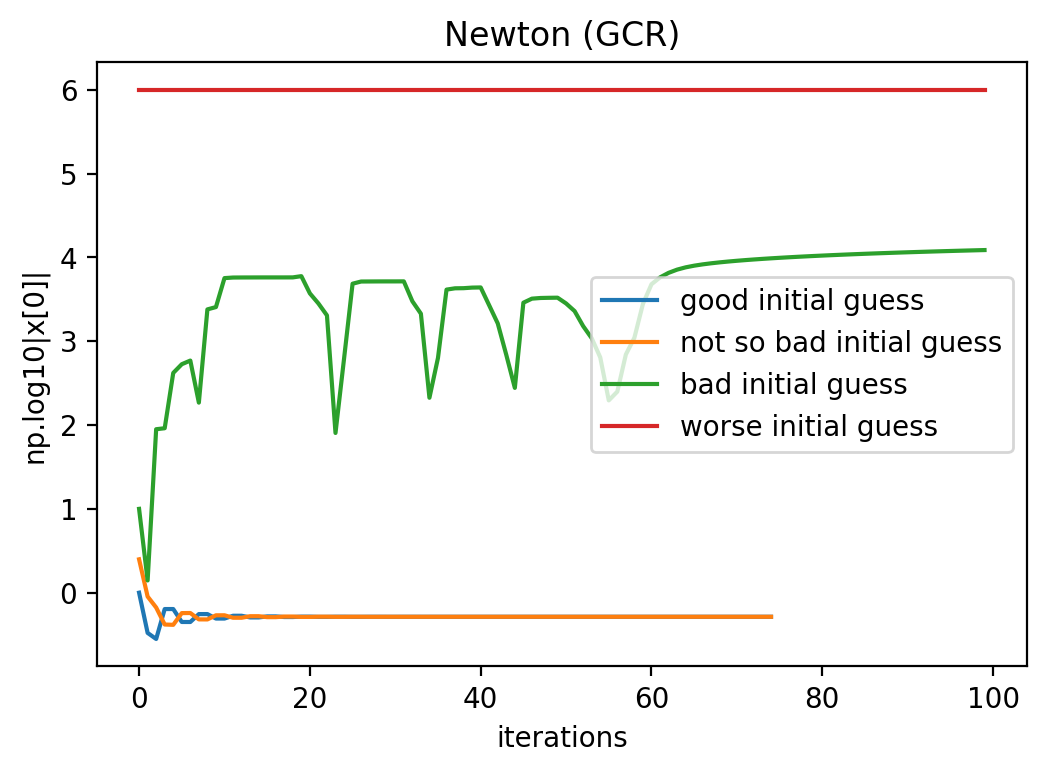

In [122]:
fig, ax = plt.subplots(1, dpi =200)

iters = good_iterations_gcr
ax.plot(np.arange(len(iters[:,0])), np.log10(np.abs(iters[:,0])), label="good initial guess") 

iters = bad_iterations_0_gcr
ax.plot(np.arange(len(iters[:,0])), np.log10(np.abs(iters[:,0])), label="not so bad initial guess") 

iters = bad_iterations_gcr
ax.plot(np.arange(len(iters[:,0])), np.log10(np.abs(iters[:,0])), label="bad initial guess") 


iters = bad_iterations_2_gcr
ax.plot(np.arange(len(iters[:,0])), np.log10(np.abs(iters[:,0])), label="worse initial guess") 

ax.set_xlabel("iterations")
ax.set_ylabel("np.log10|x[0]|")
ax.set_title("Newton (GCR)")
plt.legend()
plt.show()

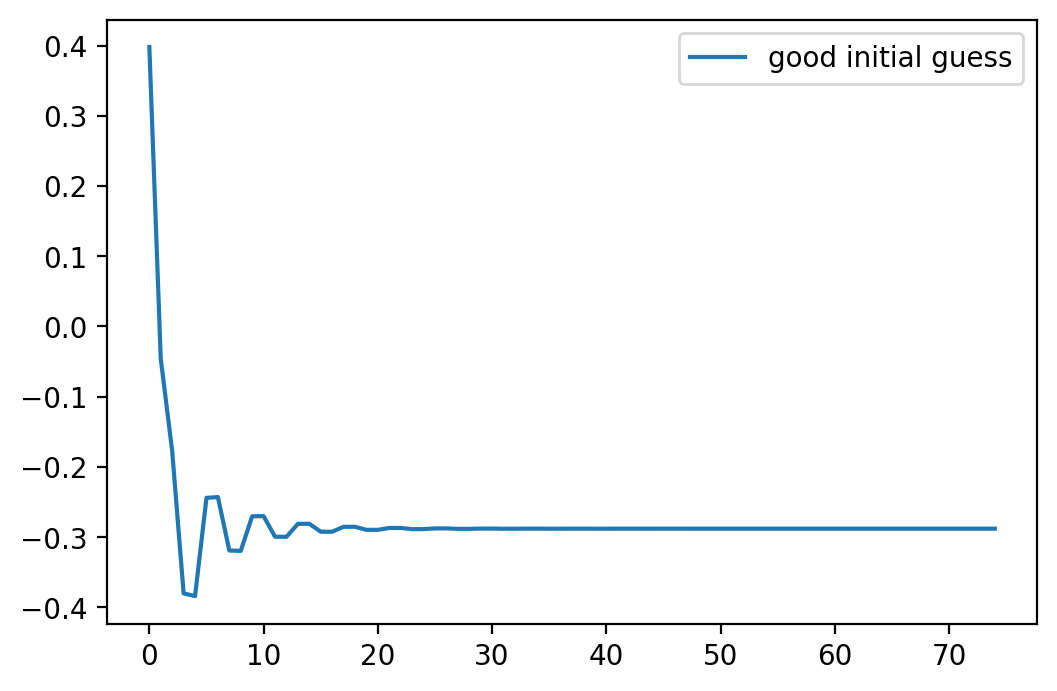

In [104]:
fig, ax = plt.subplots(1, dpi =200)

iters = bad_iterations_0
ax.plot(np.arange(len(iters[:,0])), np.log10(np.abs(iters[:,0])), label="good initial guess") 

# iters = bad_iterations_0_gcr
# ax.plot(np.arange(len(iters[:,0])), np.log10(np.abs(iters[:,0])), label="not so bad initial guess (gcr)") 

plt.legend()